<a href="https://colab.research.google.com/github/feniltailor22/Machine-Learning-Projects/blob/main/Classification_of_Cancer_Data_using_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/cancer_classification.csv')

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


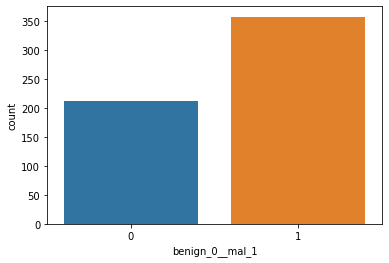

In [ ]:
#EDA
sns.countplot(x='benign_0__mal_1', data=df)

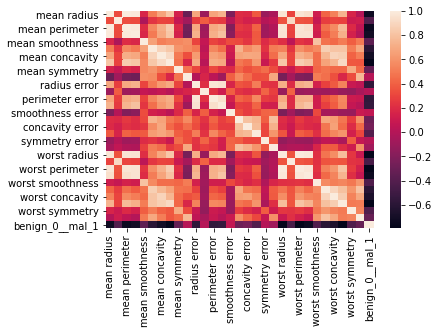

In [ ]:
#Checking the correlation with heatmap
sns.heatmap(data=df.corr())

In [ ]:
#Another method to check correlation
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

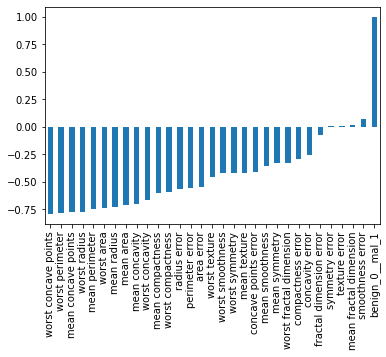

In [ ]:
#Plotting the correlation
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split

In [ ]:
X= df.drop('benign_0__mal_1', axis=1) #Input
y=df['benign_0__mal_1'] #Output

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=101)

In [ ]:
#Scaling the Data- Removing the dominating effect of higher valued columns with MinMax Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler= MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [ ]:
#Scaled Training Input
X_train

array([[0.30280346, 0.28779168, 0.28292922, ..., 0.35910653, 0.13207175,
        0.09320478],
       [0.27589412, 0.25160636, 0.25735448, ..., 0.33852234, 0.33609304,
        0.11976912],
       [0.38255296, 0.26885357, 0.36398575, ..., 0.28549828, 0.40114331,
        0.11681753],
       ...,
       [0.44468907, 0.3361515 , 0.42142408, ..., 0.52233677, 0.21387739,
        0.05791683],
       [0.57678947, 0.39634765, 0.55279156, ..., 0.70378007, 0.41671595,
        0.2863702 ],
       [0.32922354, 0.30334799, 0.31402418, ..., 0.44123711, 0.25310467,
        0.23133937]])

In [ ]:
#Scaled Testing Input
X_test

array([[0.26317335, 0.29861346, 0.2461044 , ..., 0.29010309, 0.27951902,
        0.11025843],
       [0.34536915, 0.21203923, 0.32136119, ..., 0.25611684, 0.22866154,
        0.11347239],
       [0.29008269, 0.22387555, 0.27070086, ..., 0.28298969, 0.28760103,
        0.09477896],
       ...,
       [0.51954597, 0.46060196, 0.52553979, ..., 0.68591065, 0.14508181,
        0.44182081],
       [0.22696805, 0.28643896, 0.22772692, ..., 0.48659794, 0.21584861,
        0.24701561],
       [0.41680121, 0.38451133, 0.41303892, ..., 0.73333333, 0.28346146,
        0.32638069]])

In [ ]:
#Creating a Deep Learning Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [ ]:
X_train.shape

(426, 30)

In [ ]:
#Dropout
from tensorflow.keras.layers import Dropout

In [ ]:
#Creating Layers
model= Sequential()

model.add(Dense(units=30, activation='relu')) #Hidden Layer-1 
model.add(Dropout(0.5))
model.add(Dense(units=15, activation='relu')) #Hidden Layer-2
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid')) #Output Layer

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#We can try other optimizer as well: Stochastic Gradient Descent(SGD), RMSProp, Momentum, adadelta

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#Early-Stopping: It is a method to find out the best no. of epoch for the model. 
early_stop= EarlyStopping(monitor='val_loss', patience=25, mode='auto', verbose=1)

In [ ]:
#Training the model
model.fit(x=X_train,
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test),
          verbose=True,
          callbacks=[early_stop]
          ) 

Epoch 1/600
14/14 [==============================] - 1s 16ms/step - loss: 0.7300 - accuracy: 0.4272 - val_loss: 0.6776 - val_accuracy: 0.6713
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.7025 - accuracy: 0.5258 - val_loss: 0.6621 - val_accuracy: 0.7552
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6695 - accuracy: 0.6268 - val_loss: 0.6490 - val_accuracy: 0.8042
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6454 - accuracy: 0.6854 - val_loss: 0.6341 - val_accuracy: 0.8531
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6362 - accuracy: 0.6995 - val_loss: 0.6132 - val_accuracy: 0.9021
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6260 - accuracy: 0.7089 - val_loss: 0.5923 - val_accuracy: 0.9441
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6051 - accuracy: 0.7535 - val_loss: 0.5658 - val_accuracy: 0.9301
Epoch 8/600


In [ ]:
model_loss= pd.DataFrame(data=model.history.history)

In [ ]:
model_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.730044,0.427230,0.677589,0.671329
1,0.702459,0.525822,0.662112,0.755245
2,0.669456,0.626761,0.649029,0.804196
3,0.645393,0.685446,0.634092,0.853147
4,0.636175,0.699531,0.613162,0.902098


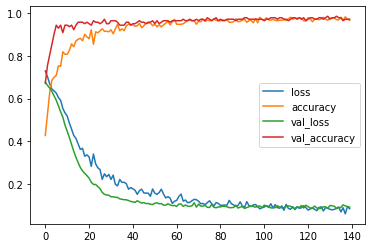

In [ ]:
model_loss.plot()

In [ ]:
#Checking the maximum loss
model_loss.max()

loss            0.730044
accuracy        0.983568
val_loss        0.677589
val_accuracy    0.986014
dtype: float64

In [ ]:
#Checking the minimum loss 
model_loss.min()

loss            0.059442
accuracy        0.427230
val_loss        0.084790
val_accuracy    0.671329
dtype: float64

In [ ]:
pred = model.predict(X_test)

In [ ]:
score= model.evaluate(X_test, y_test)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

5/5 [==============================] - 0s 2ms/step - loss: 0.0908 - accuracy: 0.9720
Test Score: 0.09084095060825348
Test Accuracy: 0.9720279574394226
